<a href="https://colab.research.google.com/github/AlaseeriRawan/single-projects/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython
import Bio
import pylab
import urllib
import pandas as pd

!pip install nglview
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
  Created wheel for nglview: filename=nglview-3.0.8-py3-none-any.whl size=10216163 sha256=cf17dc4d74c968e14b70ba7e1854ec1ed399e6ba081df5a511eda77733d7786d
  Stored in directory: /root/.cache/pip/wheels/2e/6c/59/32bf4aa0134f9c4cdca054f5192839fb4285241e2f17f7d358
Successfully built nglview


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

In [ ]:
#load FASTA file
seq_file_read = SeqIO.read('sequence.fasta', 'fasta')
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [ ]:
#type
type(seq_file_read)

Bio.SeqRecord.SeqRecord

In [ ]:
#list sequence details
seq_file_read.id

'MN908947.3'

In [ ]:
#get sequence
seqfromfile = seq_file_read.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [ ]:
#list sequence details
for record in SeqIO.parse('sequence.fasta', 'fasta'):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [ ]:
#store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [ ]:
#length of sequence
len(seqfromfile)


29903

In [ ]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

In [ ]:
#DNA sequence
seqfromfile[0:4]

Seq('ATTA')

In [ ]:
#count the nucleotides frequency in the DNA
DNA= seqfromfile
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#create a dataframe
nts = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts = nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts = nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


In [ ]:
nts.head(20)


,nucleotides,frequency
3,C,5492
2,G,5863
0,A,8954
1,T,9594


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['nucleotides'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['frequency', 'nucleotides'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['frequency', 'count()', 'nucleotides'], **{})
chart

<Axes: xlabel='nucleotides', ylabel='frequency'>

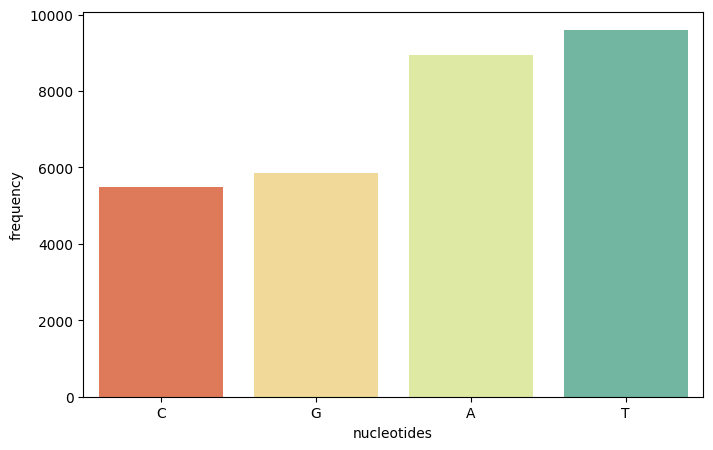

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x="nucleotides", y="frequency", data=nts, palette='Spectral')

In [ ]:
#transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('AUUAAAGGUU')

In [ ]:
print(CodonTable.unambiguous_dna_by_id[1])


Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [ ]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [ ]:
#back transcribe
protein_seq.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [ ]:
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

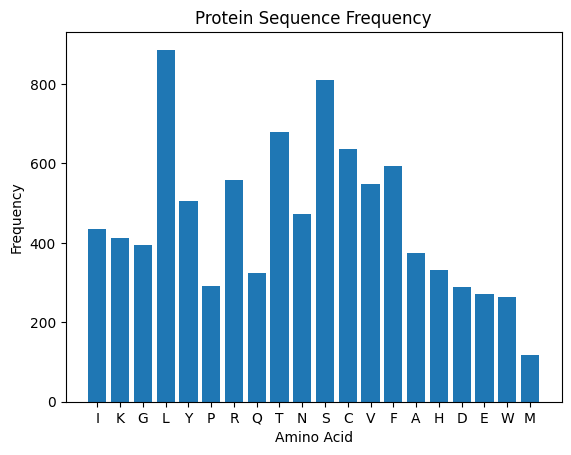

In [ ]:
#delete stop codon
del common_amino['*']

#visualize all 20 amino acid occurrences in the form of a histogram
pylab.bar(common_amino.keys(), common_amino.values())
pylab.xlabel('Amino Acid')
pylab.ylabel('Frequency')
pylab.title('Protein Sequence Frequency')

In [ ]:
#split sequence
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [ ]:
#convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})
df

,protein_seq
0,QTNQLSISCRSVL
1,TNFKICVAVTRLHA
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS
4,TALCVHQTFGCSNCTSWSCYG
...,...
185,FLQTIATIHEQC
186,LNSGLNSCRPHKADGLYKRFRFSVYDI
187,SHIAIFNQCVTLGRT
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM
